In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import seaborn as sns
#import pydotplus

/home/carlisle/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Simple DecisionTreeClassifier() fitting

In [10]:
# dataset
higgs = pd.read_csv('mean_data.csv') #choose between mean_data.csv

# divide by test and train
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']

In [11]:
## selecting features

# todrop = ['DER_sum_pt', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_lep_eta_centrality', 'PRI_met_sumet', 'PRI_jet_leading_pt', 'PRI_jet_subleading_pt','Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_num', 'PRI_jet_leading_phi', 'PRI_jet_subleading_phi', 'PRI_met_phi', 'PRI_lep_phi', 'PRI_tau_phi' ]
todrop = ['Weight','Label','KaggleSet','KaggleWeight']
X_train = train.drop(todrop, axis = 1).set_index('EventId')
X_test = test.drop(todrop, axis = 1).set_index('EventId')

#feats = ['DER_mass_MMC' , 'DER_mass_transverse_met_lep', 'DER_mass_vis']
#X_train = train[feats]
#X_test = test[feats]

# scaling
scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1

## polynomial features
# only use for limited features

## model building 
model = DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 2, splitter = 'best')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)

print('Accuracy score of simple DecisionTree Classifier:', accuracy_score(y_train, y_pred))
print('Tree Score on test data:', model.score(X_test_scaled,y_test))

Accuracy score of simple DecisionTree Classifier: 0.743892
Tree Score on test data: 0.74305


## Drawing the tree

In [12]:
y_pred_test = model.predict(X_test_scaled)
print('Accuracy score of simple DecisionTree Classifier: (test)', accuracy_score(y_test, y_pred_test))
print('Tree Score on train data:', model.score(X_train_scaled,y_train))

Accuracy score of simple DecisionTree Classifier: (test) 0.74305
Tree Score on train data: 0.743892


In [13]:
X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
100000,138.470000,51.655,97.827,27.980,0.910000,124.71100,2.66600,3.064,41.928,197.760,...,-0.277,258.733,2,67.435000,2.150000,0.444000,46.062000,1.240000,-2.47500,113.497
100001,160.937000,68.768,103.235,48.146,2.404626,372.18105,-0.82874,3.473,2.078,125.157,...,-1.916,164.546,1,46.226000,0.725000,1.158000,57.810286,-0.006669,-0.01047,46.226
100002,121.867697,162.172,125.953,35.635,2.404626,372.18105,-0.82874,3.148,9.336,197.814,...,-2.186,260.414,1,44.251000,2.053000,-2.028000,57.810286,-0.006669,-0.01047,44.251
100003,143.905000,81.417,80.943,0.414,2.404626,372.18105,-0.82874,3.310,0.414,75.968,...,0.060,86.062,0,84.904285,-0.001248,-0.018856,57.810286,-0.006669,-0.01047,-0.000
100004,175.864000,16.915,134.805,16.405,2.404626,372.18105,-0.82874,3.891,16.405,57.983,...,-0.871,53.131,0,84.904285,-0.001248,-0.018856,57.810286,-0.006669,-0.01047,0.000


### A tree of max_depth = 2

[Text(334.8, 543.6, 'DER_mass_transverse_met_lep <= -0.009\ngini = 0.45\nsamples = 250000\nvalue = [164333, 85667]'),
 Text(167.4, 326.16, 'DER_mass_vis <= -0.324\ngini = 0.5\nsamples = 130000\nvalue = [63381, 66619]'),
 Text(83.7, 108.72000000000003, 'gini = 0.441\nsamples = 53594\nvalue = [35998, 17596]'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.46\nsamples = 76406\nvalue = [27383, 49023]'),
 Text(502.20000000000005, 326.16, 'DER_met_phi_centrality <= 0.544\ngini = 0.267\nsamples = 120000\nvalue = [100952, 19048]'),
 Text(418.5, 108.72000000000003, 'gini = 0.194\nsamples = 97140\nvalue = [86542, 10598]'),
 Text(585.9, 108.72000000000003, 'gini = 0.466\nsamples = 22860\nvalue = [14410, 8450]')]

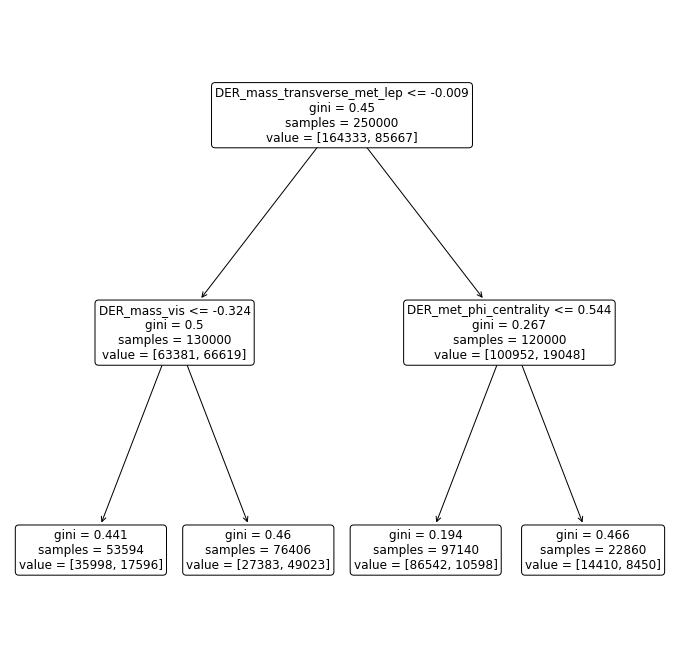

In [15]:
#df2 = X_train.columns.get_values()
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize = 12, rounded = True, feature_names = X_train.columns.tolist())

## Looping over different parameters to optimize DecisionTreeClassifier()

Decision Tress can be optimized through numerous parameter tuning and pre pruning methods. Strategies can be
     
     - choosing a splitter, "best" splitter calculates the best features to split based on the impurity measure and uses that to split the nodes. "random" splitter split randomly, ofc.
     
     (Impurity - a measure of homogeneity of the labels on a node - two methods of measuring it: Information gain and Gini Index)
     
     - max_depth of tree, default = None, the max depth of a decision tree is one less than the number of training samples. (if 'None', sklearn will expand the nodes until all leaves are 'pure'.


### looping over increasing max_depth, criterion, and type of splitter

crit = entropy and split = random TRAIN accuracy score [0.660072 0.67958  0.718848 0.71878  0.70932  0.715488 0.765584 0.790776
 0.764388 0.796532 0.80172  0.821124 0.8148   0.822288 0.836696 0.84296
 0.856608 0.867616 0.86602  0.89132 ]
crit = entropy and split = random TEST accuracy score [0.66073 0.67907 0.71962 0.71965 0.71065 0.71645 0.76352 0.78787 0.76016
 0.79459 0.79539 0.80863 0.80216 0.80626 0.80957 0.80879 0.81055 0.80228
 0.80463 0.79625]
crit = entropy and split = best TRAIN accuracy score [0.659312 0.773988 0.794488 0.8017   0.804336 0.80818  0.815308 0.820632
 0.826972 0.83218  0.837152 0.844832 0.852464 0.8611   0.870464 0.881664
 0.892792 0.904004 0.91562  0.926508]
crit = entropy and split = best TEST accuracy score [0.65512 0.77161 0.79287 0.79929 0.80267 0.80557 0.81195 0.8153  0.81944
 0.82094 0.81993 0.82006 0.81789 0.81462 0.81066 0.8068  0.80399 0.79938
 0.79585 0.79093]
crit = gini and split = random TRAIN accuracy score [0.660072 0.67958  0.718848 0.71878  0.

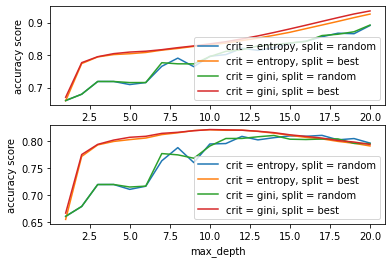

<Figure size 1152x1152 with 0 Axes>

In [7]:
fig, axs = plt.subplots(2)
plt.figure(figsize=(16,16))
max_depth_range = np.linspace(1, 20, 20) # absolute maximum of this value is the number of training samples minus 1
criterions = ['entropy', 'gini']
splitter = ['random', 'best']


for crit in criterions: 
    for split in splitter:
        
        accscore = np.zeros(len(max_depth_range))
        accscore_test = np.zeros(len(max_depth_range))
        treescore = np.zeros(len(max_depth_range))
        j = 0
        
        for depth in max_depth_range:
            model = DecisionTreeClassifier(random_state = 10, criterion = crit, max_depth = depth, splitter = split)
            model.fit(X_train_scaled, y_train)
            ypred = model.predict(X_train_scaled)
            ypred_test = model.predict(X_test_scaled)
            accscore[j] = accuracy_score(y_train, ypred)
            accscore_test[j] = accuracy_score(y_test, ypred_test)
            treescore[j] = model.score(X_test_scaled,y_test)
            j += 1
        
        print('crit = {} and split = {} TRAIN accuracy score'.format(crit, split), accscore)
        print('crit = {} and split = {} TEST accuracy score'.format(crit, split), accscore_test)
        
        # plotting score vs max_depth
        axs[0].plot(max_depth_range, accscore, label = 'crit = {}, split = {}'.format(crit, split))
        axs[1].plot(max_depth_range, accscore_test, label = 'crit = {}, split = {}'.format(crit, split))
        
        axs[0].set_xlabel('max_depth')
        axs[0].set_ylabel('accuracy score')
        axs[1].set_xlabel('max_depth')
        axs[1].set_ylabel('accuracy score')
        
        axs[0].legend()
        axs[1].legend()

#plt.plot(max_depth_range, accscore, label = 'train')
#plt.plot(max_depth_range, accscore_test, label = 'test')

### overfitting with increasing max_depth

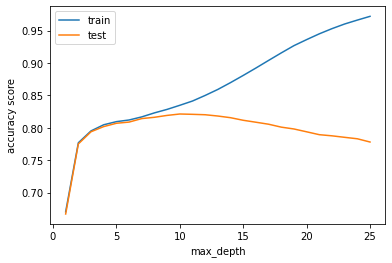

In [11]:
#plt.figure(figsize=(12,12))
max_depth_range = np.linspace(1, 25, 25)

# initializing
accscore = np.zeros(len(max_depth_range))
accscore_test = np.zeros(len(max_depth_range))
j = 0

for depth in max_depth_range:
    model = DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = depth, splitter = 'best')
    model.fit(X_train_scaled, y_train)
    ypred = model.predict(X_train_scaled)
    ypred_test = model.predict(X_test_scaled)
    accscore[j] = accuracy_score(y_train, ypred)
    accscore_test[j] = accuracy_score(y_test, ypred_test)
    j += 1

plt.plot(max_depth_range, accscore, label = 'train')
plt.plot(max_depth_range, accscore_test, label = 'test')
plt.xlabel('max_depth')
plt.ylabel('accuracy score')
plt.legend()

In [ ]:
# remark: Decision trees also suffer from overfitting, we then choos a max_depth of 8

# Testing different feature matrices

I just repeat the procedure with optimized parameters, just changing the feature matrices or the dataset itself.

In [13]:
higgs = pd.read_csv('mean_data.csv')
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']
todrop = ['Weight','Label','KaggleSet','KaggleWeight'] 
X_train = train.drop(todrop, axis = 1).set_index('EventId')
X_test = test.drop(todrop, axis = 1).set_index('EventId')
scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1
model = DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 8, splitter = 'best')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


print('Accuracy score of simple DecisionTree Classifier: (train)', accuracy_score(y_train, y_pred))
print('Accuracy score of simple DecisionTree Classifier: (test)', accuracy_score(y_test, y_pred_test))
print('Tree Score on train data:', model.score(X_train_scaled,y_train))
print('Tree Score on test data:', model.score(X_test_scaled,y_test))

Accuracy score of simple DecisionTree Classifier: (train) 0.823016
Accuracy score of simple DecisionTree Classifier: (test) 0.8162
Tree Score on train data: 0.823016
Tree Score on test data: 0.8162


## Dropping phi features

In [12]:
higgs = pd.read_csv('mean_data.csv')
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']
todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_num', 'PRI_jet_leading_phi', 'PRI_jet_subleading_phi', 'PRI_met_phi', 'PRI_lep_phi', 'PRI_tau_phi' ]
X_train = train.drop(todrop, axis = 1).set_index('EventId')
X_test = test.drop(todrop, axis = 1).set_index('EventId')
scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1
model = DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 8, splitter = 'best')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


print('Accuracy score of simple DecisionTree Classifier: (train)', accuracy_score(y_train, y_pred))
print('Accuracy score of simple DecisionTree Classifier: (test)', accuracy_score(y_test, y_pred_test))
print('Tree Score on train data:', model.score(X_train_scaled,y_train))
print('Tree Score on test data:', model.score(X_test_scaled,y_test))

Accuracy score of simple DecisionTree Classifier: (train) 0.822996
Accuracy score of simple DecisionTree Classifier: (test) 0.81623
Tree Score on train data: 0.822996
Tree Score on test data: 0.81623


## how about a design matrix of only the _mass features?

In [14]:
higgs = pd.read_csv('mean_data.csv')
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']

X_train = train[['DER_mass_MMC' , 'DER_mass_transverse_met_lep', 'DER_mass_vis']].set_index('EventId')
X_test = test[['DER_mass_MMC' , 'DER_mass_transverse_met_lep', 'DER_mass_vis']].set_index('EventId')


scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1
model = DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 8, splitter = 'best')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


print('Accuracy score of simple DecisionTree Classifier: (train)', accuracy_score(y_train, y_pred))
print('Accuracy score of simple DecisionTree Classifier: (test)', accuracy_score(y_test, y_pred_test))

Accuracy score of simple DecisionTree Classifier: (train) 0.768824
Accuracy score of simple DecisionTree Classifier: (test) 0.76612


### fitting higher order polynomials for a feature with _mass columns only?

Accuracy score of simple DecisionTree Classifier: (train) [0.768824 0.769264 0.768112 0.768732 0.768676 0.768648 0.768764 0.768736
 0.76882  0.768788]
Accuracy score of simple DecisionTree Classifier: (test) [0.76611 0.76604 0.76466 0.76499 0.7655  0.76535 0.76485 0.76522 0.76492
 0.7655 ]


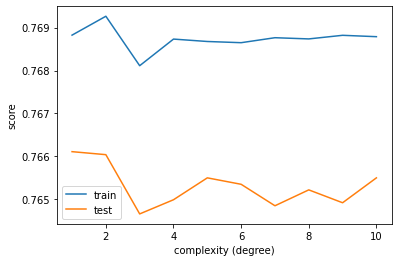

In [18]:
from sklearn.preprocessing import PolynomialFeatures
higgs = pd.read_csv('mean_data.csv')
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']

X_train = train[['DER_mass_MMC' , 'DER_mass_transverse_met_lep', 'DER_mass_vis']].set_index('EventId')
X_test = test[['DER_mass_MMC' , 'DER_mass_transverse_met_lep', 'DER_mass_vis']].set_index('EventId')

scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1
model = DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 8, splitter = 'best')
degree = [i for i in range(1,11)]
trainscore = np.zeros(len(degree))
testscore = np.zeros(len(degree))

j = 0
for deg in degree:
    poly = PolynomialFeatures(deg)
    X_train_scaled_ = poly.fit_transform(X_train_scaled)
    X_test_scaled_ = poly.transform(X_test_scaled)
    
    ## model building 
    model.fit(X_train_scaled_, y_train)
    y_pred = model.predict(X_train_scaled_)
    y_pred_test = model.predict(X_test_scaled_)
    trainscore[j] = accuracy_score(y_train, y_pred)
    testscore[j] = accuracy_score(y_test, y_pred_test)
    j += 1
    


print('Accuracy score of simple DecisionTree Classifier: (train)', trainscore)
print('Accuracy score of simple DecisionTree Classifier: (test)', testscore)
plt.plot(degree, trainscore, label = 'train')
plt.plot(degree, testscore, label = 'test')
plt.ylabel('score')
plt.xlabel('complexity (degree)')
plt.legend()

Conclusion: feature matrix didn't matter really, it was better with more features.

# Comparing to differently imputed datasets

### zero_data

In [25]:
higgs = pd.read_csv('zero_data.csv')
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']
todrop = ['Weight','Label','KaggleSet','KaggleWeight'] 
X_train = train.drop(todrop, axis = 1).set_index('EventId')
X_test = test.drop(todrop, axis = 1).set_index('EventId')
scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1
model = DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 8, splitter = 'best')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


print('Accuracy score of simple DecisionTree Classifier: (train)', accuracy_score(y_train, y_pred))
print('Accuracy score of simple DecisionTree Classifier: (test)', accuracy_score(y_test, y_pred_test))
print('Tree Score on train data:', model.score(X_train_scaled,y_train))
print('Tree Score on test data:', model.score(X_test_scaled,y_test))

Accuracy score of simple DecisionTree Classifier: (train) 0.825144
Accuracy score of simple DecisionTree Classifier: (test) 0.81932
Tree Score on train data: 0.825144
Tree Score on test data: 0.81932


### most_frequent

In [20]:
higgs = pd.read_csv('most_frequent_data.csv')
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']
todrop = ['Weight','Label','KaggleSet','KaggleWeight'] 
X_train = train.drop(todrop, axis = 1).set_index('EventId')
X_test = test.drop(todrop, axis = 1).set_index('EventId')
scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1
model = DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 8, splitter = 'best')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


print('Accuracy score of simple DecisionTree Classifier: (train)', accuracy_score(y_train, y_pred))
print('Accuracy score of simple DecisionTree Classifier: (test)', accuracy_score(y_test, y_pred_test))
print('Tree Score on train data:', model.score(X_train_scaled,y_train))
print('Tree Score on test data:', model.score(X_test_scaled,y_test))

Accuracy score of simple DecisionTree Classifier: (train) 0.824824
Accuracy score of simple DecisionTree Classifier: (test) 0.81766
Tree Score on train data: 0.824824
Tree Score on test data: 0.81766


In [ ]:
# Remarks the zero_data seems to give the best scores, not so significant difference though

# BAGGING the DecisionTreeClassifier?
After optimizing some parameters in the DecisionTreeClassifier we try one last attempt to boost the accuracy score by baggign the decission tree classifier.

Bagging is an ensemble model that simply combines the prediction from many decision trees. It is defined as bootstrap aggregation and is a general purpose procedure for reducing the variance of a classifier. It supposedly improves prediction accuracy, however, with DECREASED interpretability (a collection of bagged trees is more difficult to interpret than a simple lone decision tree).  

Ultimately, it increases our accuracy score very little, an improvement (nonetheless).

In [3]:
from sklearn.ensemble import BaggingClassifier

higgs = pd.read_csv('zero_data.csv')
train = higgs[higgs['KaggleSet'] == 't' ]
test = higgs[higgs['KaggleSet'] == 'b' ]
data = pd.concat((train,test))
y_train = train['Label']
y_test = test['Label']
todrop = ['Weight','Label','KaggleSet','KaggleWeight'] 
X_train = train.drop(todrop, axis = 1).set_index('EventId')
X_test = test.drop(todrop, axis = 1).set_index('EventId')
scaler = StandardScaler() #MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:,0] = 1
X_test_scaled[:,0] = 1
model = BaggingClassifier(DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 8, splitter = 'best'), n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)


print('Accuracy score of simple DecisionTree Classifier: (train)', accuracy_score(y_train, y_pred))
print('Accuracy score of simple DecisionTree Classifier: (test)', accuracy_score(y_test, y_pred_test))
print('Tree Score on train data:', model.score(X_train_scaled,y_train))
print('Tree Score on test data:', model.score(X_test_scaled,y_test))

Accuracy score of simple DecisionTree Classifier: (train) 0.830264
Accuracy score of simple DecisionTree Classifier: (test) 0.82484
Tree Score on train data: 0.830264
Tree Score on test data: 0.82484


### reminder from here on we choose the most_frequent_data set

# Dividing dataset by jet number 

We look at how the model performs for different subsets of data. We focus on dividing the data into subsets accodring to the jet_num = [0.0, 1.0, 2.0, 3.0]

In [4]:
from sklearn.ensemble import BaggingClassifier

higgs = pd.read_csv('most_frequent_data.csv')
jet_nums = [0, 1, 2, 3]
train_score = np.zeros(len(jet_nums))
test_score = np.zeros(len(jet_nums))
j = 0
for jet in jet_nums:
    train1 = higgs[higgs['KaggleSet'] == 't']
    train = train1[train1['PRI_jet_num'] == jet]
    test1 = higgs[higgs['KaggleSet'] == 'b']
    test = test1[test1['PRI_jet_num'] == jet]
    data = pd.concat((train,test))
    y_train = train['Label']
    y_test = test['Label']
    
    # feature matrix for each value of jet_num
    if jet == 0:
        todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_num', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'] 
    elif jet == 1:
        todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_num', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi']
    else:
        todrop = ['Weight','Label','KaggleSet','KaggleWeight', 'PRI_jet_num'] 
    
    X_train = train.drop(todrop, axis = 1).set_index('EventId')
    X_test = test.drop(todrop, axis = 1).set_index('EventId')
    scaler = StandardScaler() #MinMaxScaler
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled[:,0] = 1
    X_test_scaled[:,0] = 1
    model = BaggingClassifier(DecisionTreeClassifier(random_state = 10, criterion = 'gini', max_depth = 8, splitter = 'best'), n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    train_score[j] = accuracy_score(y_train, y_pred)
    test_score[j] = accuracy_score(y_test, y_pred_test)
    print('Score of (train) dataset', 'jet num = {}:'.format(jet) ,accuracy_score(y_train, y_pred))
    print('Score of (test) dataset', 'jet num = {}:'.format(jet) ,accuracy_score(y_test, y_pred_test))

Score of (train) dataset jet num = 0: 0.8556344019296788
Score of (test) dataset jet num = 0: 0.8454049747279835
Score of (train) dataset jet num = 1: 0.8155627772619416
Score of (test) dataset jet num = 1: 0.8012081452372446
Score of (train) dataset jet num = 2: 0.8437642668572223
Score of (test) dataset jet num = 2: 0.8284318563110629
Score of (train) dataset jet num = 3: 0.8639685977260422
Score of (test) dataset jet num = 3: 0.8227790432801823


Observation: improved a teeny tiny bit for jet_num = 0, 1, where columns were removed. 

To compare to other models in the project, we look at the confusion matrix for jet = 3 from the most_frequent_data.csv

# Final Confusion Matrix and Cumulative Gain Plot

The following presents the final confusion matrix from optimizing our Decision Tree Classifier. A confusion matrix presents a matrix of predicted and actual values and is a great way to evaluate our model. It presents the actual number of entries that are:
1. True Positive - where the predicted 's' categories matched the actual 's' labels
2. True Negatives - where the predicted is 'b' matched actual 'b'
3. False Positive (Negative)- wherre the predicted is 's' ('b') but actually 'b' ('s')

ref (for most of these descriptions): https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

<AxesSubplot:>

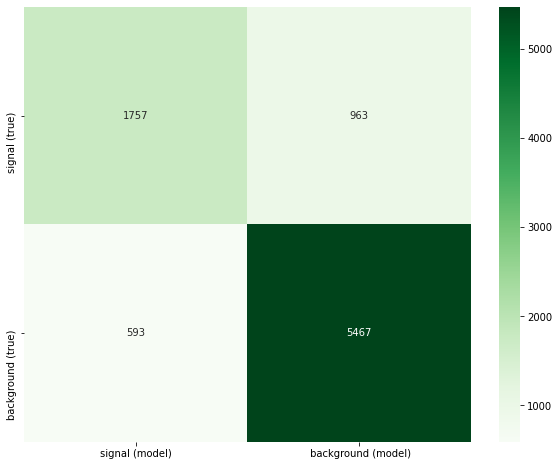

In [3]:
confmat = confusion_matrix(y_test, y_pred_test, labels = ['s','b'])
cm = pd.DataFrame(confmat,
                  index = ['signal (true)' , 'background (true)'], 
                  columns = ['signal (model)', ' background (model)'])
cm
plt.figure(figsize=[10,8])
sns.heatmap(cm, cmap='Greens', linecolor = 'black', annot = True, fmt='d')

A cumulative gain plot shows the percentage of the overall number of entries in a given label (either 's' or 'b') gained by targeting a percentage of the total numberr of entries. The diagonal line is called the baseline curve and the farther above the baseline, the greater the gain; and staying along this diagonal line means that there will be no increase in gains even for an increase of samples. These plots are great for choosing a cutoff to the amount of data you can choose to train your model. 

ref: https://www.ibm.com/support/knowledgecenter/en/SSLVMB_23.0.0/spss/tutorials/mlp_bankloan_outputtype_02.html

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

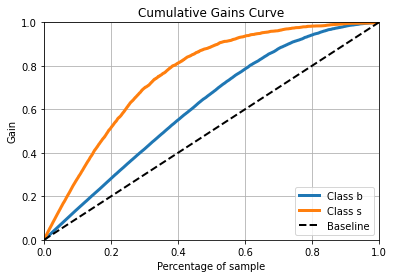

In [4]:
import scikitplot as skplt

y_probas = model.predict_proba(X_test_scaled)
skplt.metrics.plot_cumulative_gain(y_test, y_probas)